<a href="https://colab.research.google.com/github/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/Audio%20convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos de convolução com sinais de áudio

<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Carrega-uma-resposta-ao-impulso-$h(t)$" data-toc-modified-id="Carrega-uma-resposta-ao-impulso-$h(t)$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carrega uma resposta ao impulso $h(t)$</a></span></li><li><span><a href="#Carrega-um-sinal-de-áudio-$x(t)$" data-toc-modified-id="Carrega-um-sinal-de-áudio-$x(t)$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carrega um sinal de áudio $x(t)$</a></span></li><li><span><a href="#Calcula-a-convolução-$y(t)-=-x(t)\ast-h(t)$" data-toc-modified-id="Calcula-a-convolução-$y(t)-=-x(t)\ast-h(t)$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calcula a convolução $y(t) = x(t)\ast h(t)$</a></span></li><li><span><a href="#Reproduz-o-resultado-da-convolução" data-toc-modified-id="Reproduz-o-resultado-da-convolução-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reproduz o resultado da convolução</a></span></li><li><span><a href="#Grave-um-sinal-de-áudio-e-faça-o-teste" data-toc-modified-id="Grave-um-sinal-de-áudio-e-faça-o-teste-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Grave um sinal de áudio e faça o teste</a></span></li></ul></div>

In [ ]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/ElectricCircuits
    from os import chdir as cd
    cd('/content/ElectricCircuits/')
    ! pip install .

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

Cloning into 'ElectricCircuits'...
remote: Enumerating objects: 1228, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 1228 (delta 117), reused 126 (delta 67), pack-reused 1013
Receiving objects: 100% (1228/1228), 195.13 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (702/702), done.
Checking out files: 100% (320/320), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import IPython
from IPython.core.display import HTML
from IPython.display import Image
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

from scipy.io import wavfile

## Carrega uma resposta ao impulso $h(t)$

Fonte: https://www.voxengo.com/impulses/

Fs = 44100 Hz


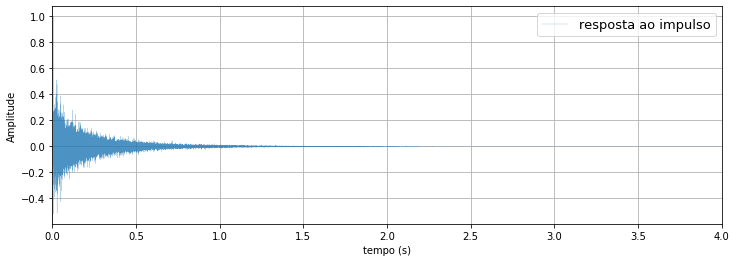

In [ ]:
# Descomente uma das linhas abaixo

Fs, h = wavfile.read('./audio files/Five Columns Long.wav')
#Fs, h = wavfile.read('./audio files/Large Wide Echo Hall.wav')
#Fs, h = wavfile.read('./audio files/Large Long Echo Hall.wav')
#Fs, h = wavfile.read('./audio files/Deep Space.wav')
#Fs, h = wavfile.read('./audio files/On a Star.wav')

h = h[:,0]/np.max(np.abs(h))

t = np.arange(0, len(h))*1/Fs
plt.figure(figsize =(12,4))
plt.plot(t, h, linewidth = 0.2, alpha=0.8, label='resposta ao impulso')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(min(t),max(t));
plt.legend();
print('Fs = '+str(Fs)+' Hz')

IPython.display.Audio('./audio files/Five Columns Long.wav')

## Carrega um sinal de áudio $x(t)$

In [ ]:
Fs, sig = wavfile.read('./audio files/violino.wav')
    
t = np.arange(0, len(sig))*1/Fs
plt.figure(figsize =(12,4))
plt.plot(t, sig, linewidth = 0.2, alpha=0.8, label='sinal de áudio')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(min(t),max(t));
plt.legend();
print('Fs = '+str(Fs)+' Hz')

IPython.display.Audio('./audio files/violino.wav')

Fs = 44100 Hz


## Calcula a convolução $y(t) = x(t)\ast h(t)$

In [ ]:
y = np.convolve(sig, h, mode='full')
y = y/np.max(np.abs(y))

t = np.arange(0, len(y))*1/Fs
plt.figure(figsize =(12,4))
plt.plot(t, y, linewidth = 0.2, alpha=0.8, label='y(t): resultado da convolução')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(min(t),max(t));
plt.legend();

wavfile.write('./audio files/sinal_convoluido.wav', int(Fs), y.astype(np.float32))

## Reproduz o resultado da convolução

In [ ]:
IPython.display.Audio('./audio files/sinal_convoluido.wav')

## Grave um sinal de áudio e faça o teste

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write

Fs = 44100  # Sample rate
seconds = 20  # Duration of recording

myrecording = sd.rec(int(seconds * Fs), samplerate=Fs, channels=2)
sd.wait()  # Wait until recording is finished
write('./audio files/gravacao.wav', Fs, myrecording)  # Save as WAV file 

Fs, sig = wavfile.read('./audio files/gravacao.wav')

sig = sig[:,0]

t = np.arange(0, len(sig))*1/Fs
plt.figure(figsize =(12,4))
plt.plot(t, sig, linewidth = 0.2, label='audio gravado')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(min(t),max(t));
plt.legend();

IPython.display.Audio('./audio files/gravacao.wav')

In [ ]:
y = np.convolve(sig, h, mode='full')
y = y/np.max(np.abs(y))

t = np.arange(0, len(y))*1/Fs
plt.figure(figsize =(12,4))
plt.plot(t, y, linewidth = 0.2, label='resultado da convolução')
plt.xlabel('tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(min(t),max(t));
plt.legend();

wavfile.write('./audio files/audio_gravado_convoluido.wav', int(Fs), y.astype(np.float32))

In [ ]:
IPython.display.Audio('./audio files/audio_gravado_convoluido.wav')